In [37]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import Dense
import os
from mlp_helper import plot_boundaries_keras, get_dataset, plot_boundaries, draw_neural_net, return_weights_notation, get_dataset_2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets import make_circles, make_moons

# Pruebas a realizar:
- hidden_units en 2 y 3
- Cambiar funcion de activación de la capa oculta: Sigmoid, Relu, Linear

# Dataset

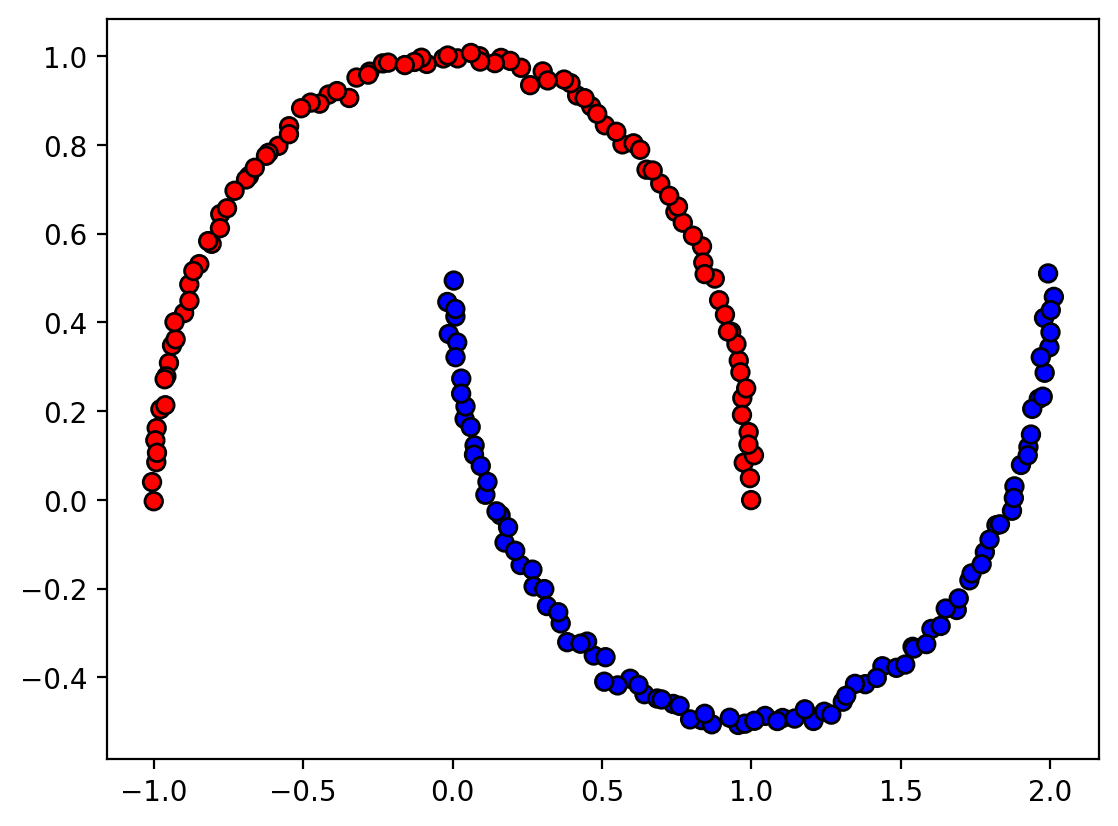

In [102]:
# X, y = get_dataset()
# X, y = get_dataset_2()
X, y = make_moons(n_samples=200, noise=0.01)
plot_boundaries(X, y)

# Modelo: Red neuronal con 1 capa oculta

In [103]:
input_dim = 2
shape = [input_dim, 10, 1]
shape

[2, 10, 1]

### Selección de función de activación
https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e

In [104]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [105]:
def plot_act(activ):
    t = np.linspace(-10, 10, 100)
    plt.plot(t, activ(t))
    plt.show()

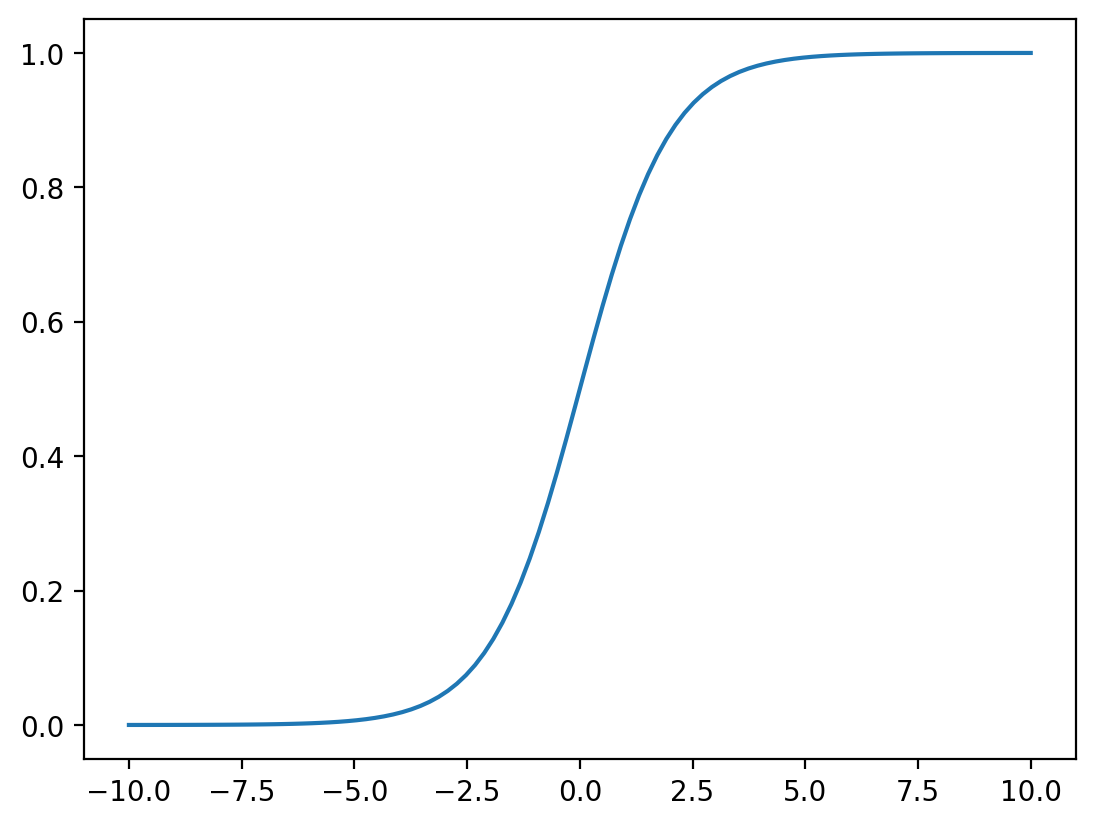

In [106]:
plot_act(sigmoid)

In [184]:
# activation = 'relu' # linear, tanh, relu, tanh, sigmoid
activation = 'tanh'

In [186]:
hidden_units = 5
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
model.add(Dense(hidden_units, activation=activation))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_188"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_226 (Dense)               │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [187]:
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.evaluate(X, y)
weights = model.get_weights()
print(weights)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6450 - loss: 0.6615  
[array([[-0.00699085, -0.1027301 , -0.6046355 ,  0.42150366, -0.79982126],
       [-0.7619347 , -0.7572183 ,  0.8936132 , -0.63022876, -0.09123057]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[-0.17110479,  0.5180502 , -0.6256474 ,  0.6014426 ,  0.16120785],
       [ 0.74307156,  0.5264523 , -0.07484329, -0.06602561,  0.17196631],
       [-0.53234017,  0.02622521, -0.18715698, -0.10359728, -0.11077535],
       [-0.75631726, -0.42815545, -0.5575696 ,  0.54096544, -0.04070401],
       [-0.09704953,  0.08650088,  0.41360486,  0.5791081 , -0.19401246]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[ 0.8624699 ],
       [-0.11762261],
       [ 0.1979971 ],
       [ 0.44606495],
       [-0.23178744]], dtype=float32), array([0.], dtype=float32)]


## Para recordar:

- Una red neuronal es la concatenación de capas
- Cada capa hace el producto entre el vector fila de entrada con la matriz de pesos, le suma el bias y luego aplica función de activación

# Entrenamiento

In [188]:
model.fit(
    X, y, epochs=1000, verbose=1
)

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - loss: 0.6563  
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7300 - loss: 0.6409
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - loss: 0.6268
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.6124
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8200 - loss: 0.5998
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.5871
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.5746
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.5627
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.5517
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.5411
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.5306
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - 

In [189]:
model.predict_proba = model.predict

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


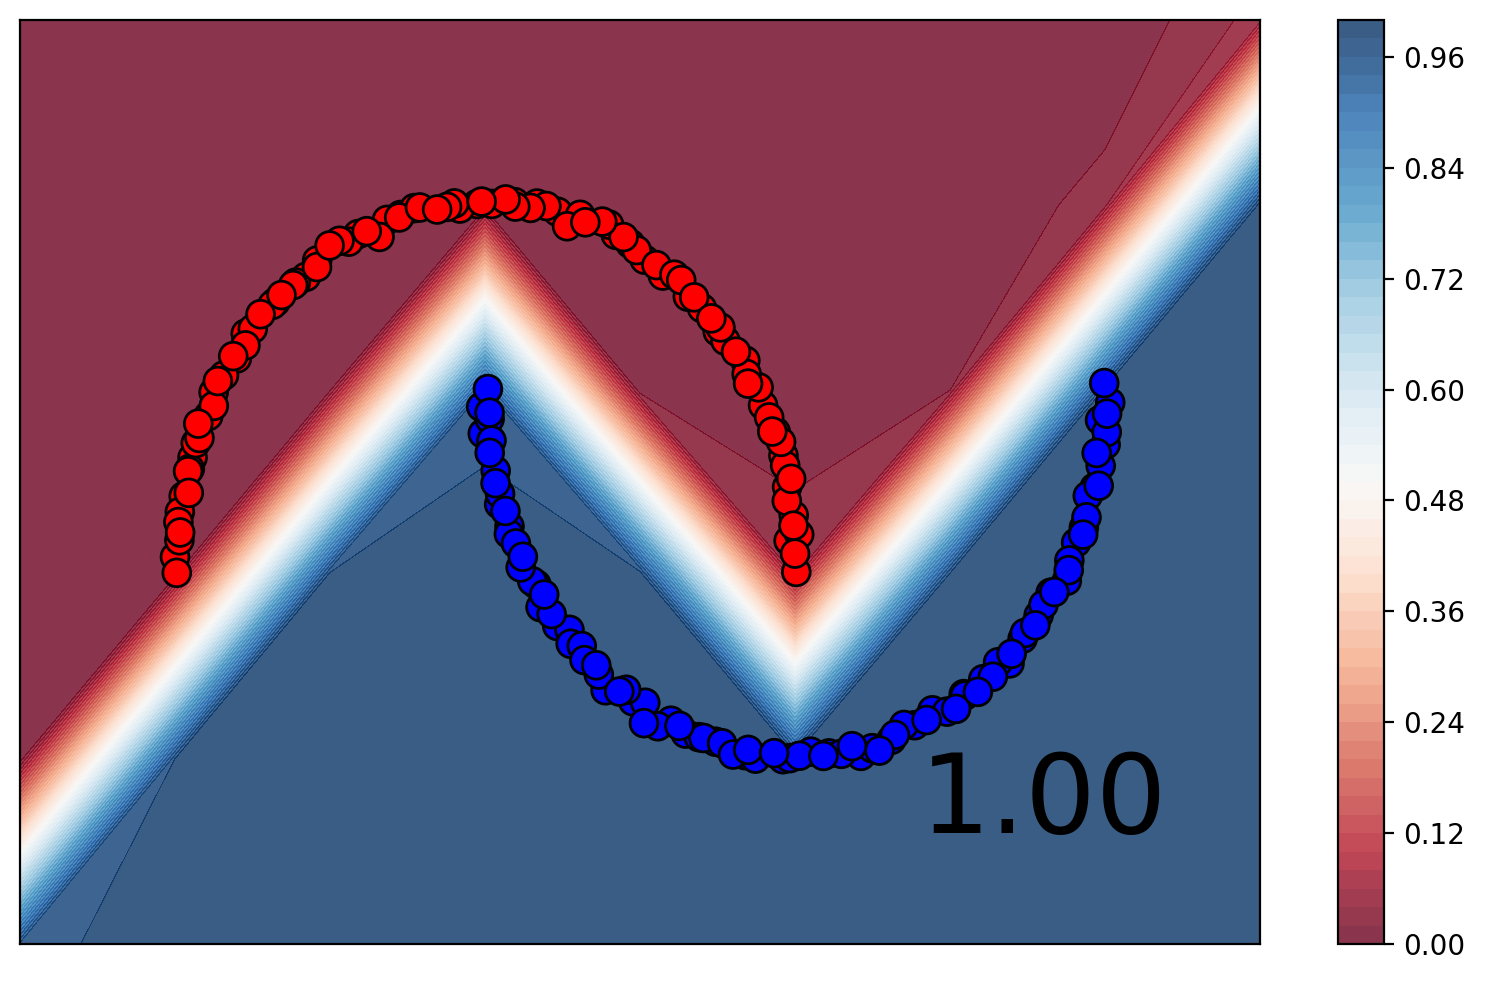

In [190]:
plt.figure(figsize=(10,6))
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba, h=0.5)

In [153]:
model.predict_proba(X).shape

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(200, 1)

## Obtenemos pesos de primera capa
### Pesos aprendidos

In [154]:
model.get_weights()

[array([[-1.78781189e-02, -1.66353658e-02,  3.99259299e-01,
         -6.13628887e-03,  3.63633364e-01, -6.34955347e-01,
          1.20907164e+00,  4.52033384e-03, -1.50010288e-01,
          6.78173721e-01,  5.61046600e-01, -6.22326024e-02,
         -4.74240184e-01, -4.97378316e-03, -2.69706225e+00,
         -7.88113996e-02,  3.90529186e-01, -5.74177325e-01,
         -2.86951289e-02, -7.07566202e-01, -6.23118043e-01,
         -9.63966548e-02, -4.17268090e-02,  4.19322878e-01,
         -1.29035577e-01,  5.36682487e-01, -4.32004407e-03,
          3.50335181e-01, -8.28676224e-01, -1.71695638e+00,
          5.47308922e-01, -5.79346597e-01, -8.23033303e-02,
         -8.68681297e-02,  4.58862662e-01,  2.02064998e-02,
         -1.38165033e-03,  5.28918326e-01, -5.83700836e-03,
          3.95771593e-01,  5.29843092e-01,  1.26559639e+00,
          5.21009088e-01,  1.22244835e+00, -7.15681970e-01,
          6.49414778e-01, -9.50589404e-02, -8.03479195e-01,
          1.22042143e+00, -1.74409643e-0

In [155]:
# Nos quedamos con los pesos de la primer capa
layer_1_w = model.get_weights()[0]
layer_1_b = model.get_weights()[1]
print(layer_1_w)
print(layer_1_b)

[[-1.78781189e-02 -1.66353658e-02  3.99259299e-01 -6.13628887e-03
   3.63633364e-01 -6.34955347e-01  1.20907164e+00  4.52033384e-03
  -1.50010288e-01  6.78173721e-01  5.61046600e-01 -6.22326024e-02
  -4.74240184e-01 -4.97378316e-03 -2.69706225e+00 -7.88113996e-02
   3.90529186e-01 -5.74177325e-01 -2.86951289e-02 -7.07566202e-01
  -6.23118043e-01 -9.63966548e-02 -4.17268090e-02  4.19322878e-01
  -1.29035577e-01  5.36682487e-01 -4.32004407e-03  3.50335181e-01
  -8.28676224e-01 -1.71695638e+00  5.47308922e-01 -5.79346597e-01
  -8.23033303e-02 -8.68681297e-02  4.58862662e-01  2.02064998e-02
  -1.38165033e-03  5.28918326e-01 -5.83700836e-03  3.95771593e-01
   5.29843092e-01  1.26559639e+00  5.21009088e-01  1.22244835e+00
  -7.15681970e-01  6.49414778e-01 -9.50589404e-02 -8.03479195e-01
   1.22042143e+00 -1.74409643e-01 -2.50669926e-01 -1.12644825e-02
   1.92438056e-05 -9.12187696e-01 -2.37255645e+00  5.66097975e-01
  -1.34418333e+00 -4.82749254e-01 -1.56631678e-01 -8.19160417e-02
  -1.06417

In [156]:
# Preparo los pesos a asignar a un "submodelo" de "regresión logistica"
model_1_weights = [np.array([layer_1_w[:,0]]).T, np.array([layer_1_b[0]])]
print(model_1_weights)

[array([[-0.01787812],
       [-0.08871651]], dtype=float32), array([-0.040346], dtype=float32)]


In [157]:
# Construimos el submodelo
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(2,), activation=activation))
model_1.summary()

Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [158]:
# Le asginamos los pesos al submodelo
model_1.set_weights(model_1_weights)
model_1.compile(Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [159]:
model_1.predict_proba = model_1.predict

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 8.0590  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


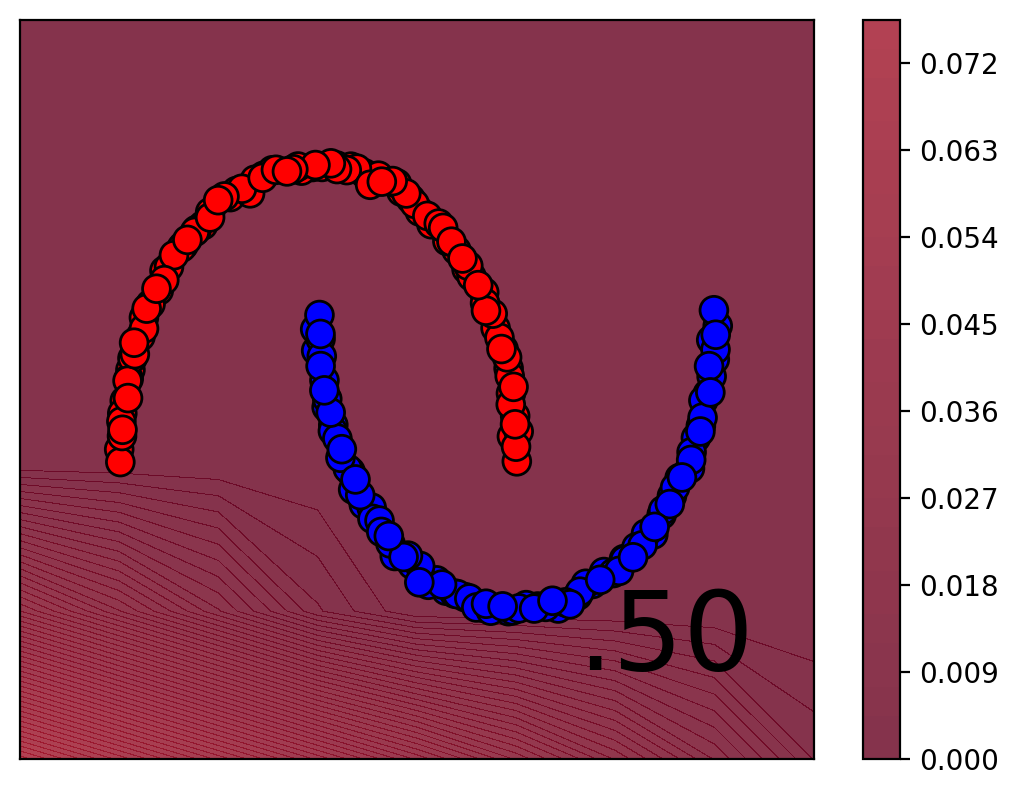

In [160]:
plot_boundaries_keras(X, y, model_1.evaluate(X,y)[1], probability_func=model_1.predict_proba, h=0.5)

### Generalizo función para armar submodelo
Y grafico los dos submodelos

In [161]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    sub_model.predict_proba = sub_model.predict
    return sub_model

### Graficamos las rectas aprendidas por los submodelos

In [164]:
rows = hidden_units // 10
cols = hidden_units // rows + hidden_units % rows
rows, cols

(10, 10)

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 197us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 8.0590 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 8.0590 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 191us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 2.6686 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 203us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 8.0757 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 210us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 2.7437 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 214us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 8.2217 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 209us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

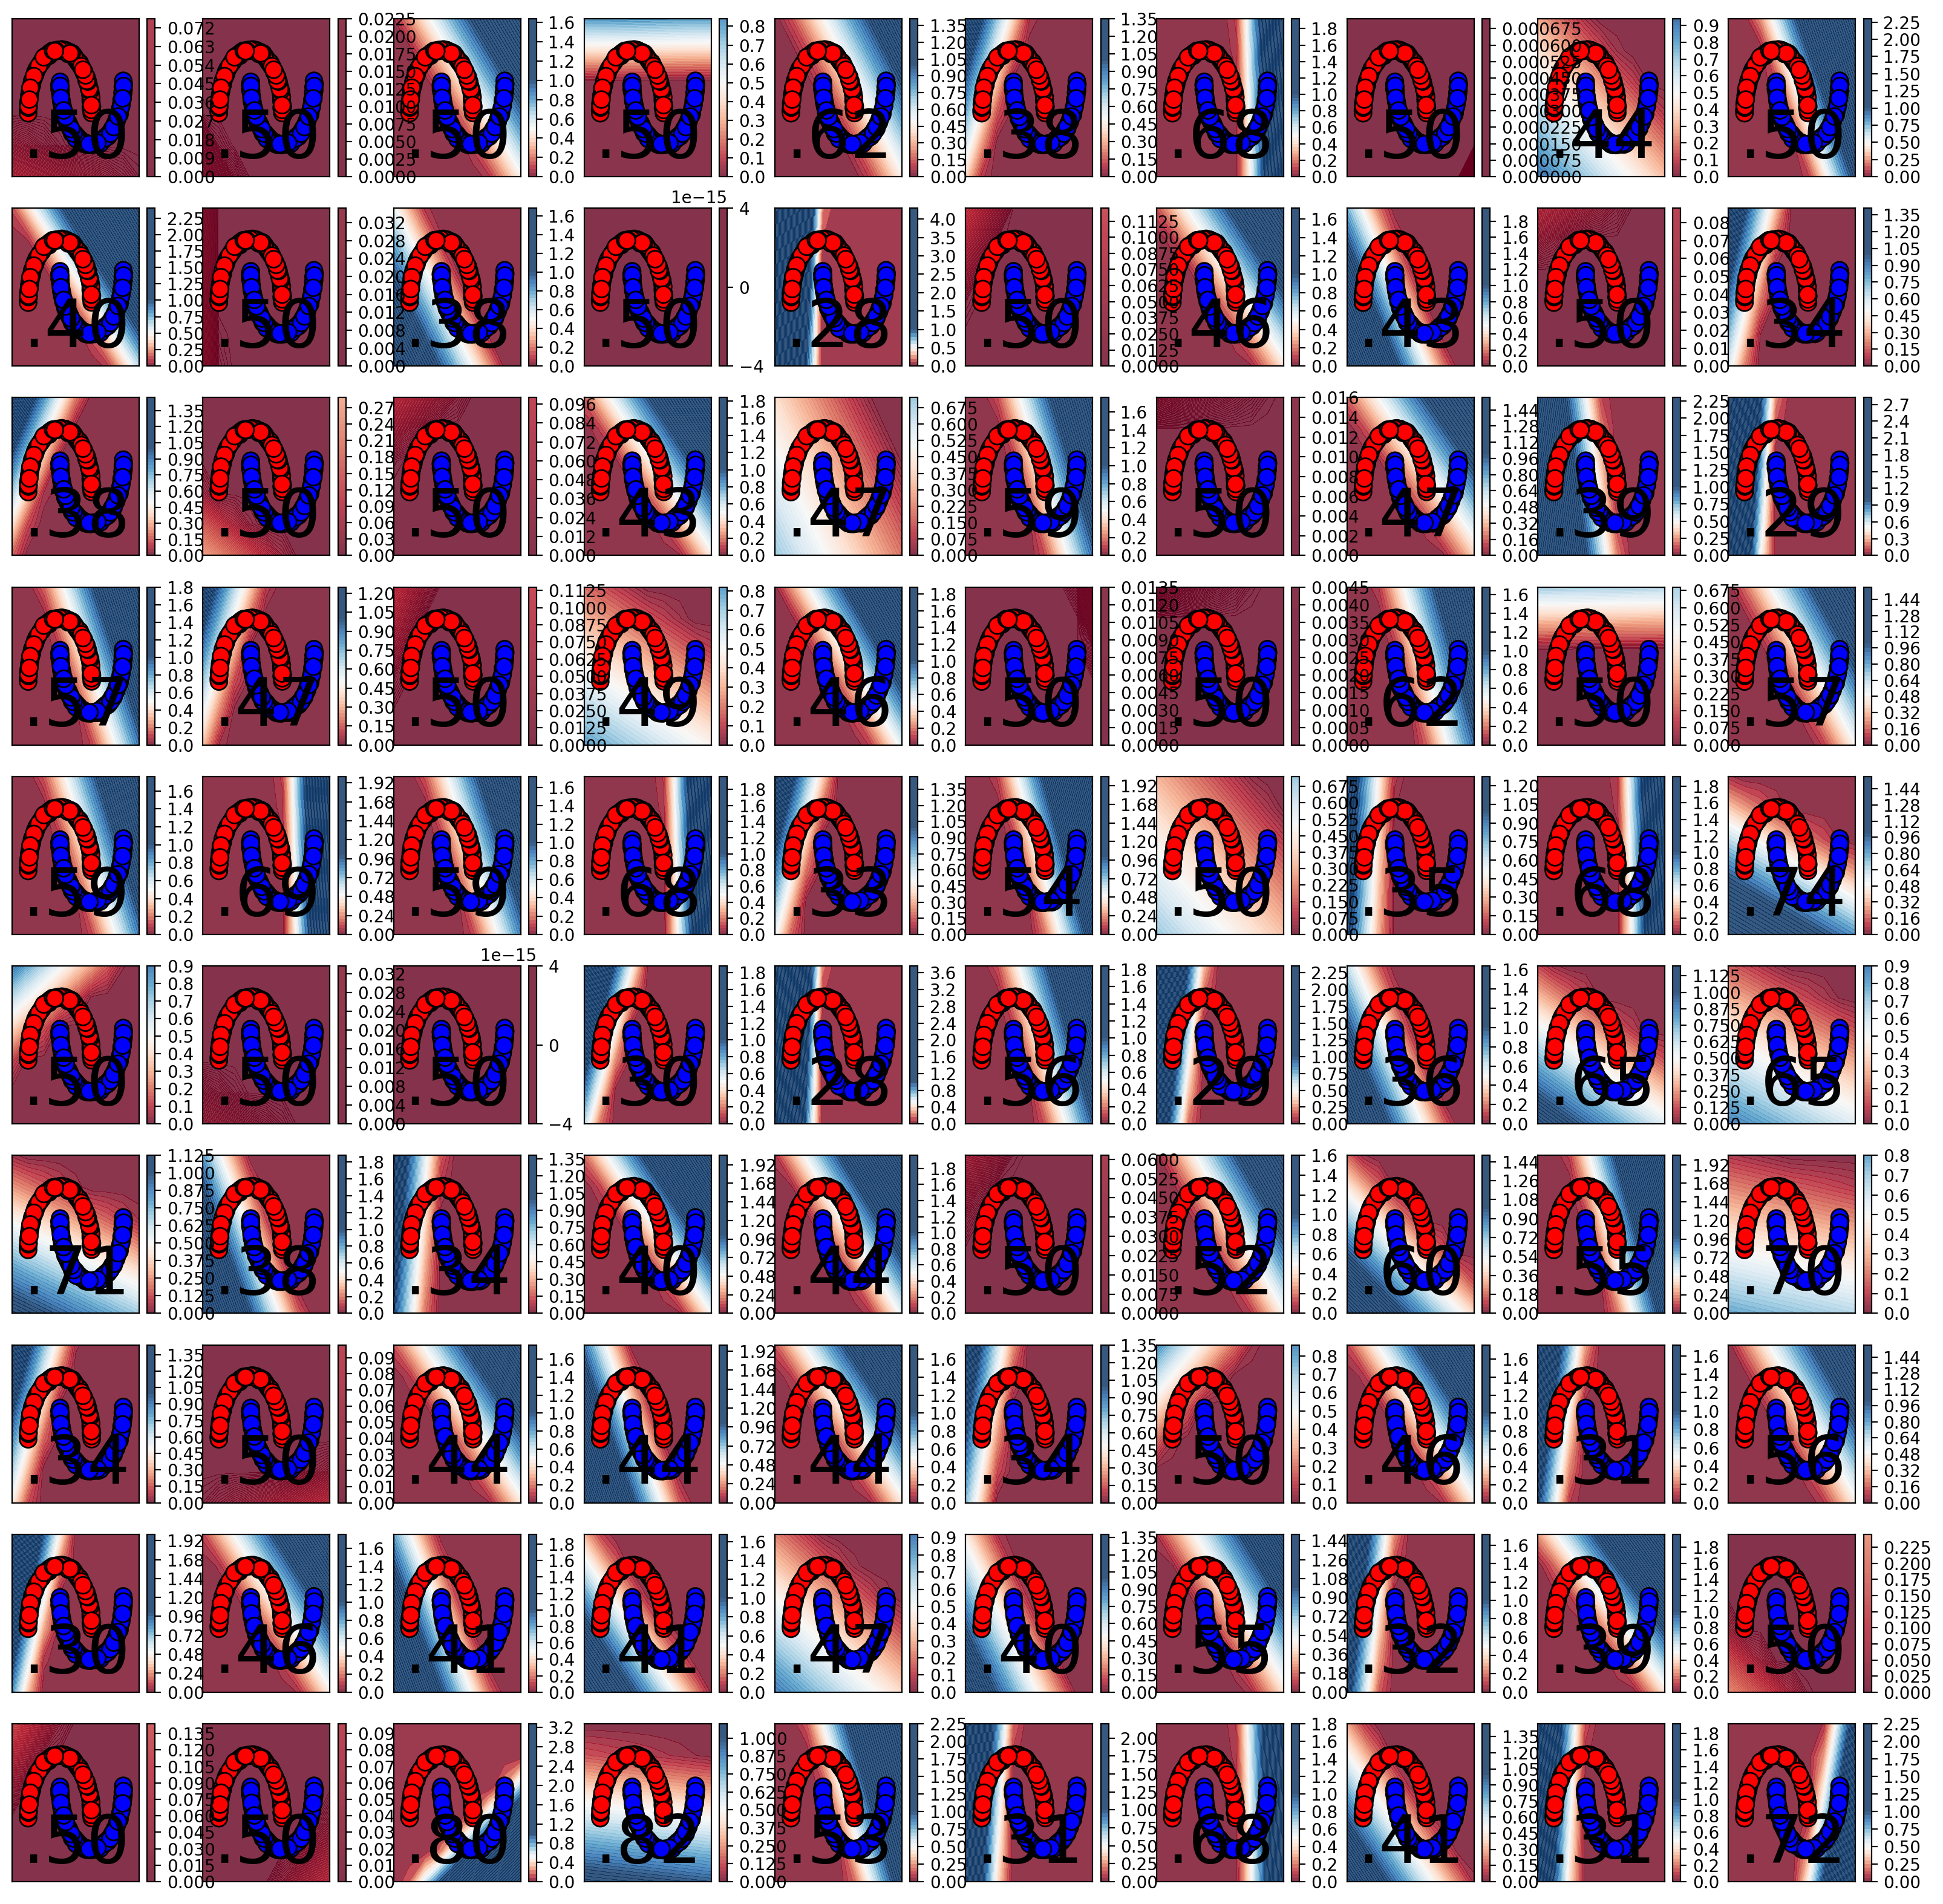

In [165]:
f, ax = plt.subplots(rows, cols, figsize=(20, 20))
sub_models = []
ax = ax.flatten()
# Para el mesh-grid
N = 300
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), N)
X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), N)

X1, X2 = np.meshgrid(X1, X2)
Z_lr_array = []

for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation)
    
    sub_models.append(sub_model)
    Z_lr = sub_model.predict_proba(np.c_[X1.ravel(), X2.ravel()])[:, 0]
    Z_lr = Z_lr.reshape(X1.shape)
    Z_lr_array.append(Z_lr)
    plot_boundaries_keras(X, y, sub_model.evaluate(X,y)[1], probability_func=sub_model.predict_proba, ax=ax[i], h=0.5)

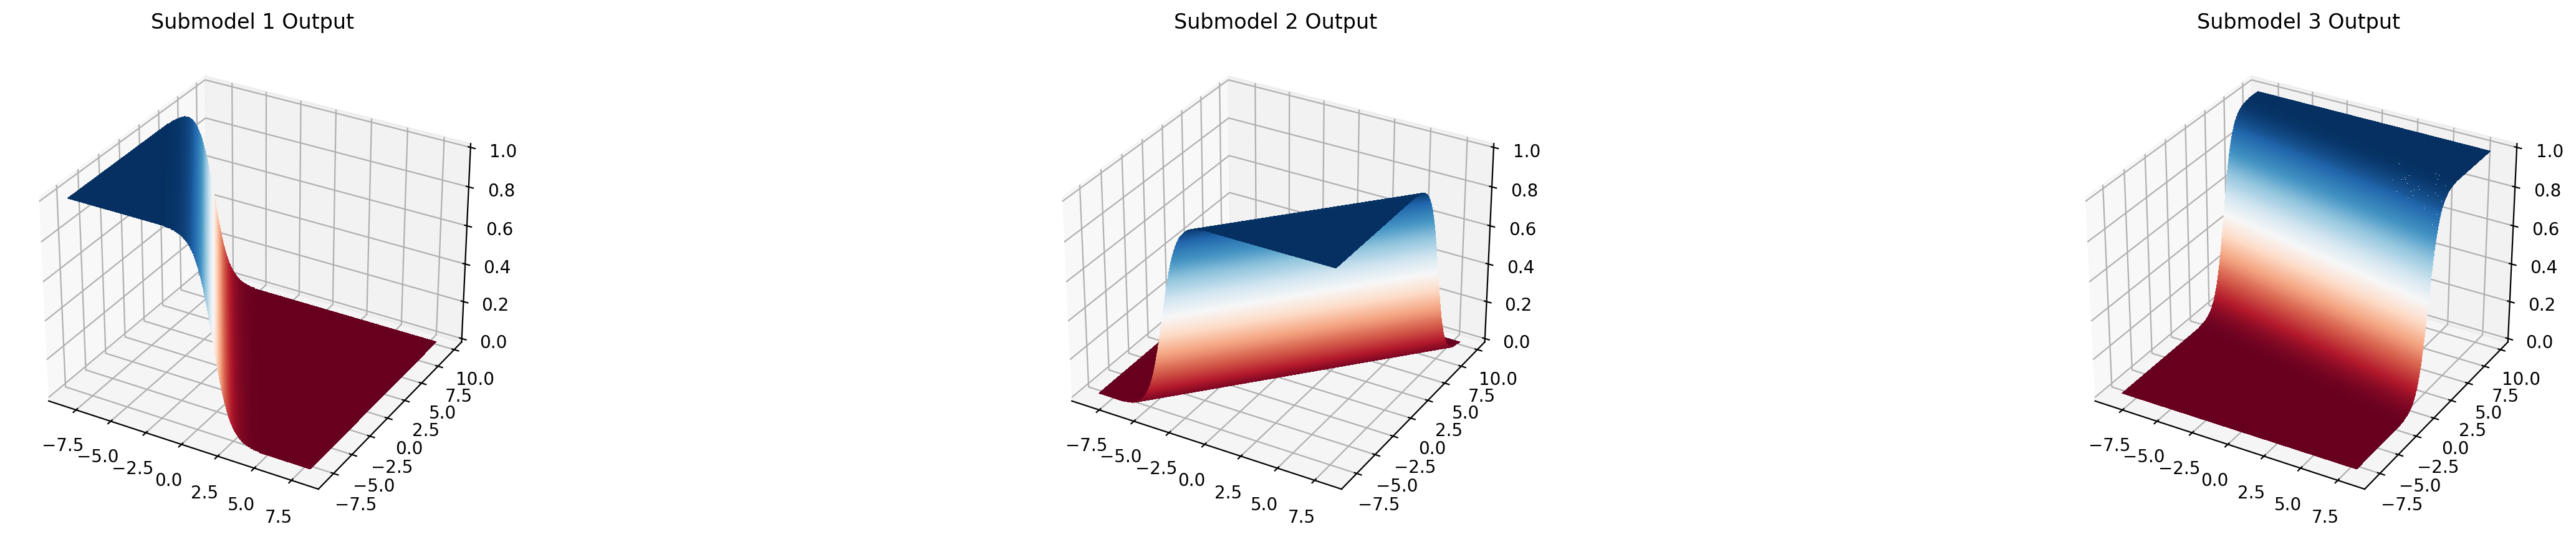

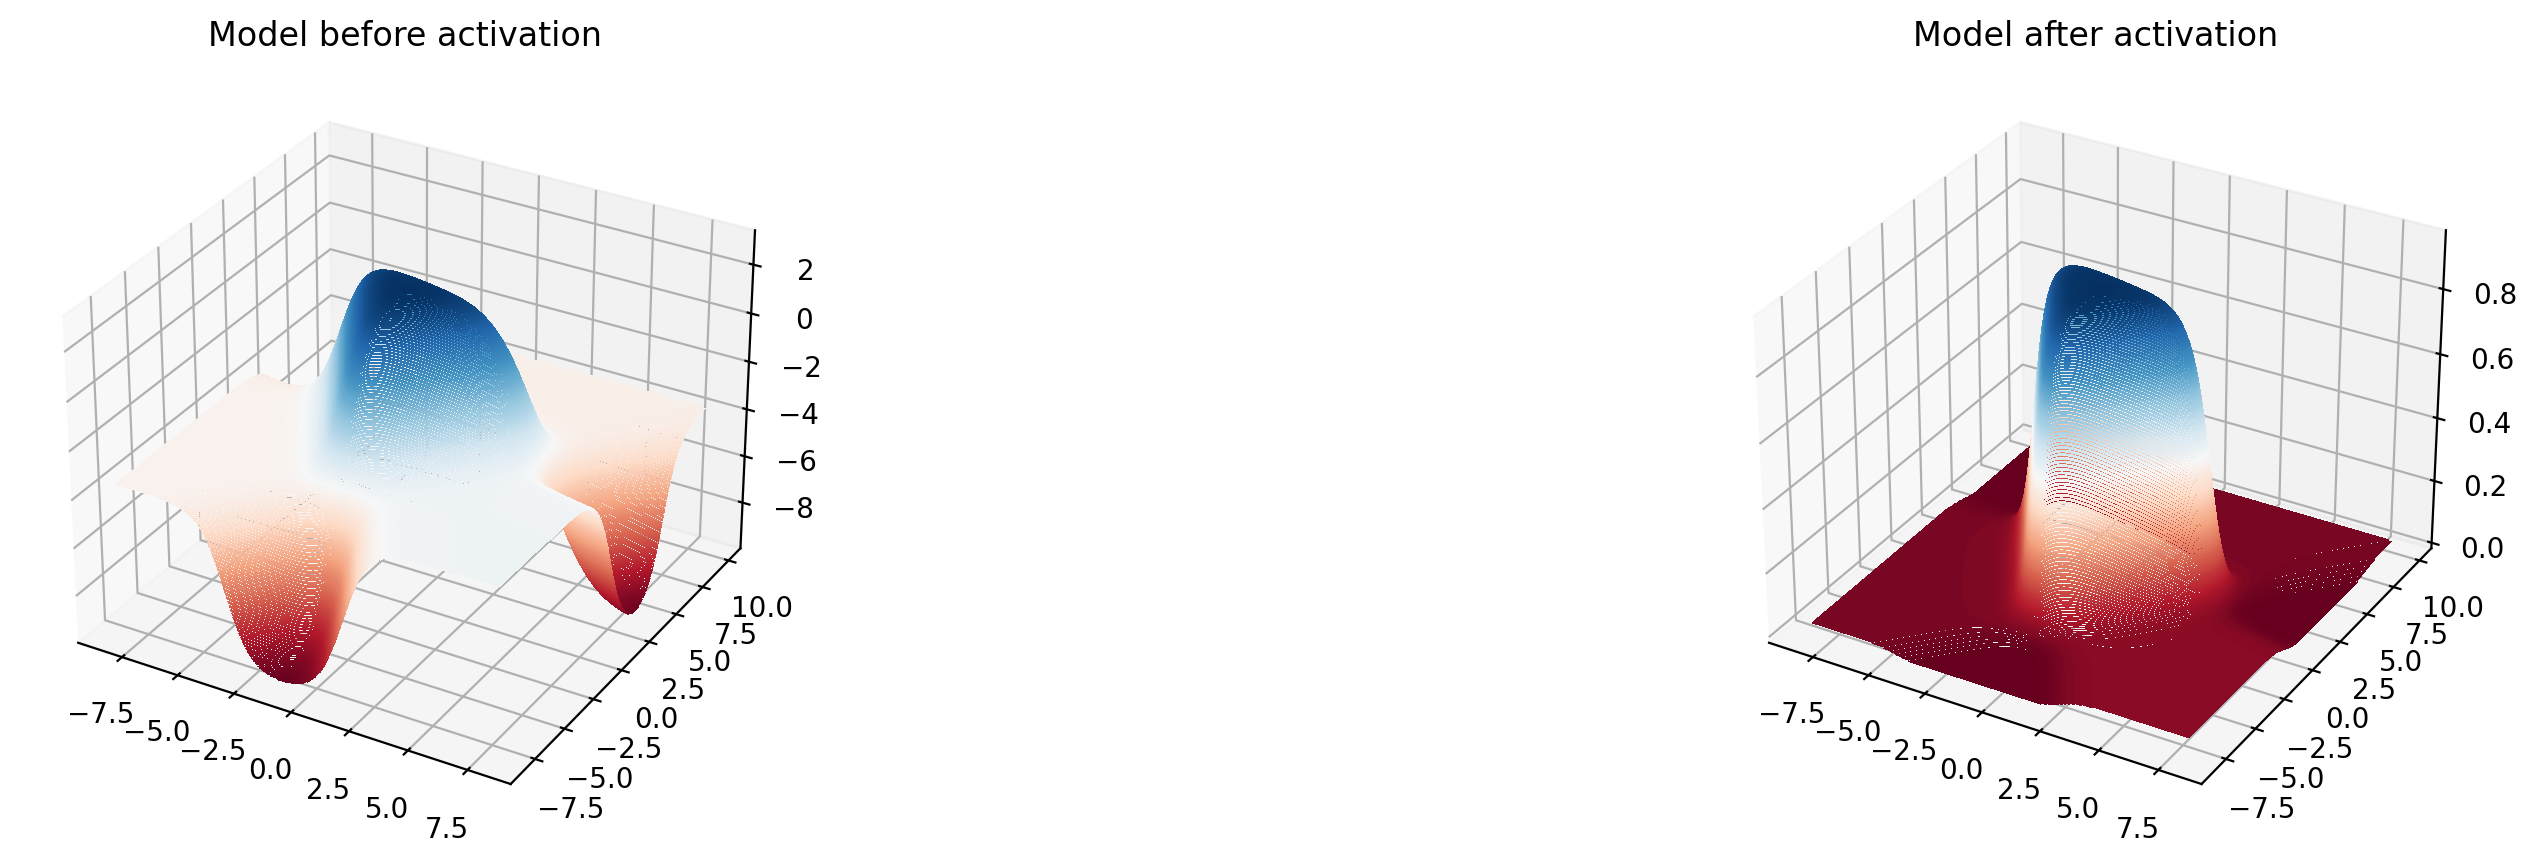

In [73]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(30,5))
Z_lr_sum = 0
for i in range(hidden_units):
    ax = fig.add_subplot(1, hidden_units, i+1, projection='3d')
    ax.contourf(X1, X2, Z_lr_array[i], 256, cmap=plt.cm.RdBu) #, cmap=cm_blues)
    ax.set_title(f'Submodel {i+1} Output')
    Z_lr_sum = Z_lr_sum + Z_lr_array[i]  * model.get_weights()[2][i][0] 
plt.show()
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contourf(X1, X2, Z_lr_sum + model.get_weights()[3][0], 256, cmap=plt.cm.RdBu) #, cmap=cm_blues)
ax.set_title(f'Model before activation')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contourf(X1, X2, sigmoid(Z_lr_sum + model.get_weights()[3][0]), 256, cmap=plt.cm.RdBu)
ax.set_title(f'Model after activation')
plt.show()

In [279]:
# Notar que en los gráficos se ve que parece estar al reves.
model.get_weights()[2]

array([[6.054812 ],
       [6.0393834],
       [6.0406017]], dtype=float32)

In [280]:
model.get_weights()[3]

array([-11.75357], dtype=float32)

In [281]:
# Por eso los pesos del siguiente submodelo (el que combina los dos) son negativos

# Espacio linealmente separable

In [315]:
X_sub_preds = []
for i in range(hidden_units):
    X_sub_preds.append(sub_models[i].predict(X))

In [316]:
# Calculamos la ubicación de las observaciones en el nuevo espacio
new_space = np.hstack(X_sub_preds)

In [317]:
new_space.shape

(300, 10)

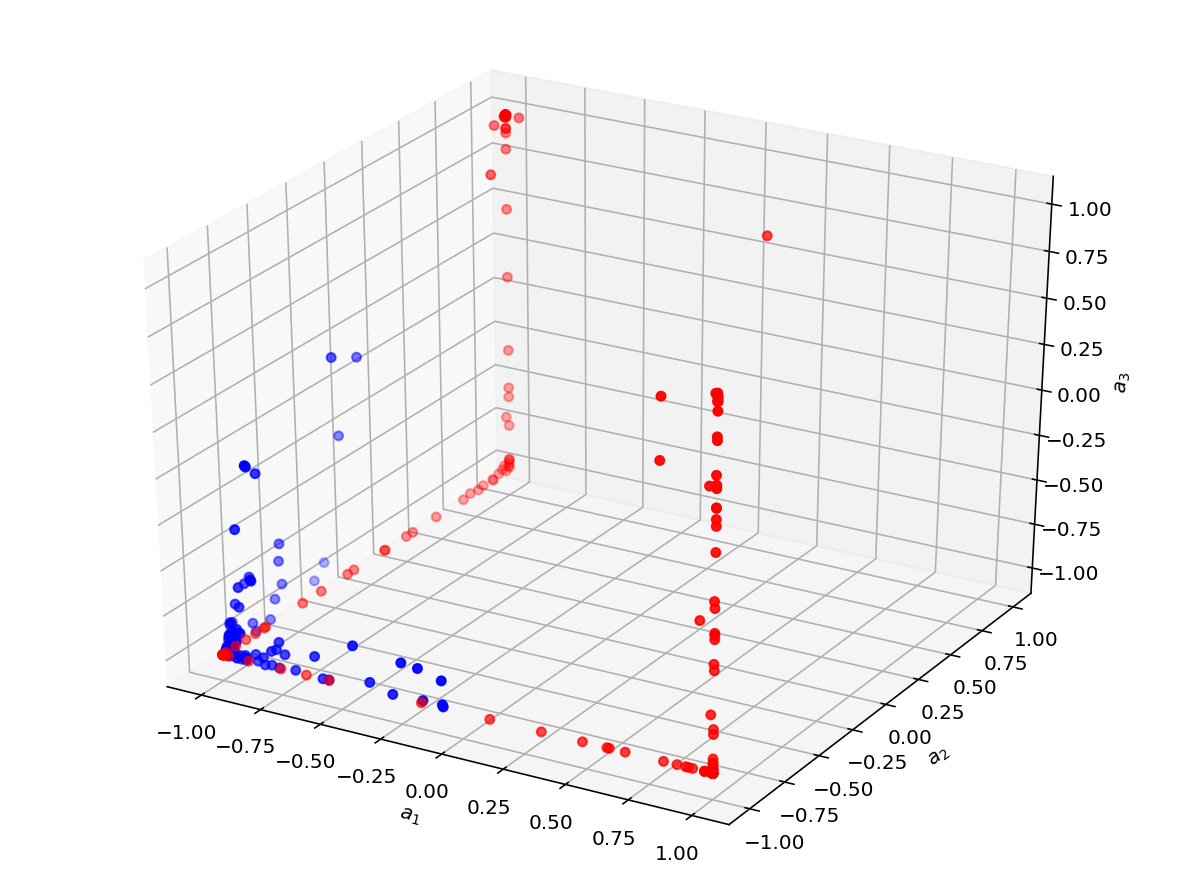

In [318]:
# Graficamos los puntos en el nuevo espacio

if hidden_units == 2:
    plt.scatter(new_space[y==1,0], new_space[y==1,1])
    plt.scatter(new_space[y==0,0], new_space[y==0,1])
    plt.show()
else:
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    ax.set_xlabel('$a_1$')
    ax.set_ylabel('$a_2$')
    ax.set_zlabel('$a_3$')

In [256]:
# Creo el submodelo de la salida. Lleva sigmoidea por que es ya la predicción
sub_model_3 = get_sub_model(model, 0, 2, 3, activation='sigmoid', input_dim=hidden_units)

In [257]:
sub_model_3.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [258]:
weights_3 = sub_model_3.get_weights()
weights_3

[array([[-4.349831 ],
        [-4.571307 ],
        [-5.2793202]], dtype=float32), array([7.341468], dtype=float32)]

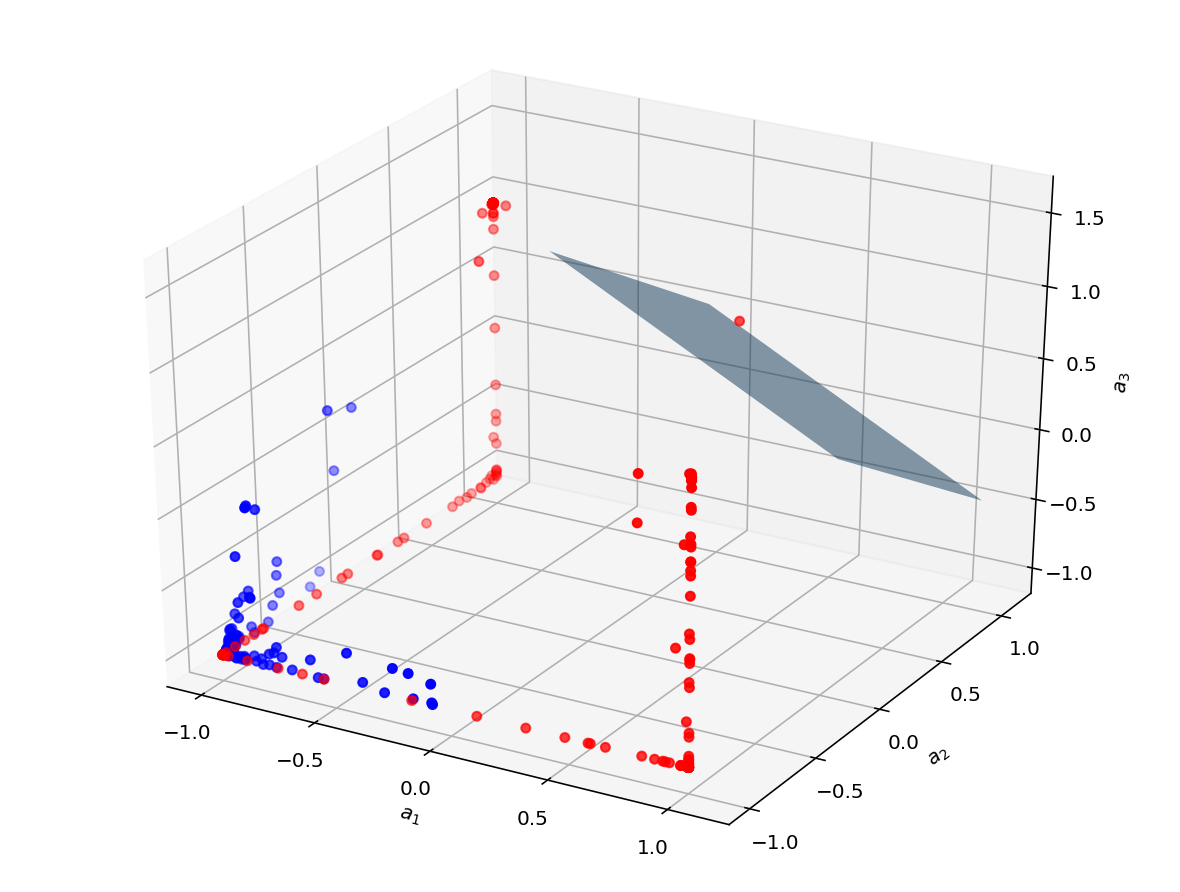

In [319]:
if hidden_units == 2:
    plot_boundaries_keras(new_space, y, sub_model_3.evaluate(new_space,y)[1], probability_func=sub_model_3.predict_proba, h=0.2)
else:
    # %matplotlib widget
    N=2
    xi, yi = np.meshgrid(np.linspace(-0.1, 1.1, N), np.linspace(-0.1, 1.1, N))
    z = (- xi*weights_3[0][0, 0 ] - yi*weights_3[0][1, 0] - weights_3[1][0])/weights_3[0][2,0]
    z = z 
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.plot_surface(xi, yi, z, alpha= 0.5)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    # ax.view_init(elev=20., azim=60)
    ax.set_xlabel('$a_1$')
    ax.set_ylabel('$a_2$')
    ax.set_zlabel('$a_3$')
    plt.show()